In [32]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [33]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

32


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,56128086f80c7d6fb50fb8f47b3c6afe4814e512,hired-sway,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,cok/adapted.txt,cq.txt,manual/cok.json,...,186,71,102.014085,28.718084,56,78.5,101.0,120.00,180,COK
1,dcb1d73223bc1dfaa69c52874a19dc164e90401a,waugh-doit,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.0,cte/format-triples-few.txt,cq.txt,manual/cte-triples.json,...,140,72,58.972222,23.177194,24,43.0,54.5,64.25,146,CTE
2,2eb01c138bb230c8019c954a06f756798896ae0a,mural-coth,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,cte/format-triples-few.txt,cq.txt,manual/cte-triples.json,...,166,77,55.896104,19.466966,19,43.0,54.0,65.00,131,CTE
3,e9722988e8445c907cb98552994cea3b6ce6755f,toxic-halm,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,cte/format-triples-few.txt,cq.txt,manual/cte-triples.json,...,113,75,51.640000,21.916081,23,39.0,46.0,57.00,140,CTE
4,31df35896055a20b4698600cdcadaa9799b33b0e,wormy-doll,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.0,cte/format-triples-ere-few.txt,cq.txt,manual/cte-triples.json,...,126,68,54.941176,19.708989,8,42.0,50.5,62.00,112,CTE


In [34]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [35]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.n_sc",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,metrics.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,sulfa-eyot,0.0,cok/adapted.txt,cq.txt,manual/cok.json,0,1,1,0.660000,0.752517,...,190,77,109.298701,28.809294,66,89.00,106.0,123.00,253,COK
1,larky-yawl,0.0,cok/adapted.txt,cq.txt,manual/cok.json,0,1,2,0.653333,0.743973,...,224,80,110.337500,28.407943,66,90.75,106.5,125.25,223,COK
2,moony-dees,0.5,cok/adapted.txt,cq.txt,manual/cok.json,0,1,1,0.656667,0.745304,...,203,78,108.474359,31.330133,56,87.00,104.5,124.50,206,COK
3,gulfy-myth,0.5,cok/adapted.txt,cq.txt,manual/cok.json,0,1,2,0.663333,0.752445,...,182,75,110.493333,29.173467,69,88.00,107.0,127.00,224,COK
4,kacha-plot,0.0,cok/adapted.txt,cq.txt,manual/cok.json,1,1,1,0.690000,0.769042,...,167,73,97.109589,25.280956,56,77.00,94.0,111.00,177,COK


In [36]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [37]:
# make temperature 1 decimal
df["params.qa.temperature"] = df["params.qa.temperature"].round(1)

In [38]:
def parse_instruction(row):
    technique = row["params.qa.technique"].lower()
    sp = row["params.qa.system_prompt"].lower().replace(technique + "/", "")
    fs = row["params.qa.few_shot_examples"].lower().replace("/" + technique, "")
    return f"{technique}/{sp}/{fs}"

df["instruction"] = df.apply(parse_instruction, axis=1)

In [39]:
target_param_cols

['params.qa.technique',
 'params.qa.system_prompt',
 'params.qa.few_shot_examples',
 'params.qa.n_shot',
 'params.qa.n_sc',
 'params.qa.temperature']

In [40]:
avg_df = df.groupby(target_param_cols)[metric_cols].max().reset_index()
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
11,CTE,cte/format-triples-ere-few,manual/cte-triples,1,1,0.5,0.716667,0.785496,0.80,0.849960,...,52.0,96,66,47.661538,18.043227,26,36.0,45.0,57.0,114
3,COK,cok/adapted,manual/cok,1,1,0.5,0.696667,0.776368,0.77,0.842713,...,110.0,186,71,102.014085,28.718084,56,78.5,101.0,120.0,180


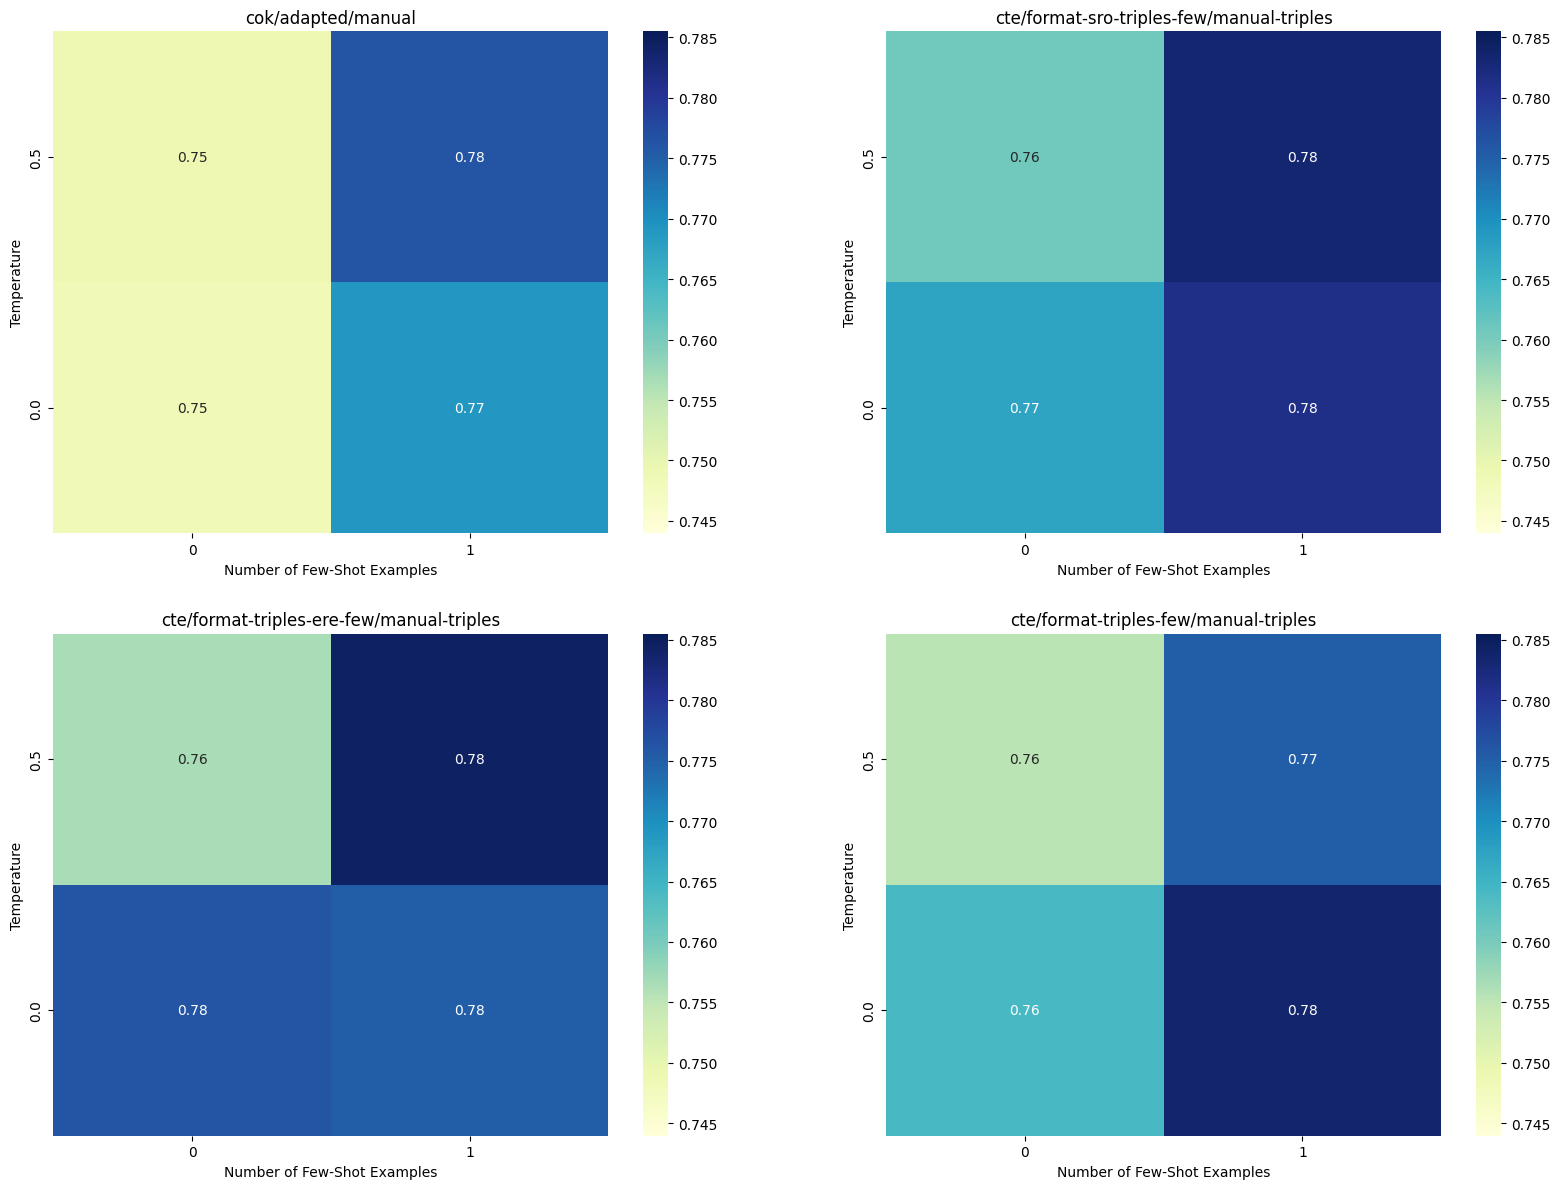

In [41]:
# Example 2: Heatmap of F1 scores based on temperature and number of few-shot examples per technique
instructions = df["instruction"].unique()
n = len(instructions)
n_cols = 2
n_rows = (n + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

vmin = df["metrics.f1"].min()
vmax = df["metrics.f1"].max()

for ax, instruction in zip(axes.flatten(), instructions):
    subset_df = df[df["instruction"] == instruction]
    pivot_table = subset_df.pivot_table(
        values="metrics.f1",
        index="params.qa.temperature",
        columns="params.qa.n_shot",
        aggfunc="mean",
    )
    sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".2f",
        cmap="YlGnBu",
        ax=ax,
        yticklabels=True,
        vmin=vmin,
        vmax=vmax
    )
    ax.set_title(instruction)
    ax.set_xlabel("Number of Few-Shot Examples")
    ax.set_ylabel("Temperature")
    ax.invert_yaxis()

# Remove any empty subplots
for ax in axes.flatten()[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Add padding between plots
plt.show()


In [43]:
# Example 3: Boxplot to show variance across different techniques
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='params.qa.technique', y='metrics.f1', hue='params.qa.model')
plt.title('F1 Score Distribution by Technique and Model')
plt.xlabel('Prompting Technique')
plt.ylabel('F1 Score')
plt.legend(title='Model')
plt.show()


ValueError: Could not interpret value `params.qa.model` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>